In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Manjuprasad\anaconda3\Lib\site-packages\bokeh\sampledata\_data\iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.drop(['sepal_length', 'sepal_width'],axis='columns',inplace=True)

Text(0, 0.5, 'petal_width')

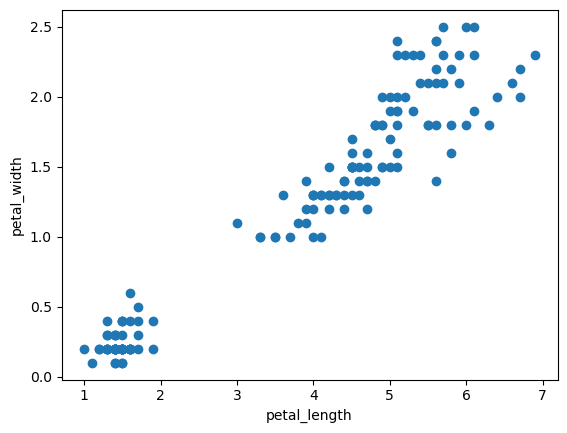

In [5]:
plt.scatter(df.petal_length, df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [6]:
df.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [7]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
df['cluster'] = y_predicted
df.head()

,petal_length,petal_width,species,cluster
0,1.4,0.2,setosa,0
1,1.4,0.2,setosa,0
2,1.3,0.2,setosa,0
3,1.5,0.2,setosa,0
4,1.4,0.2,setosa,0


In [9]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [10]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]


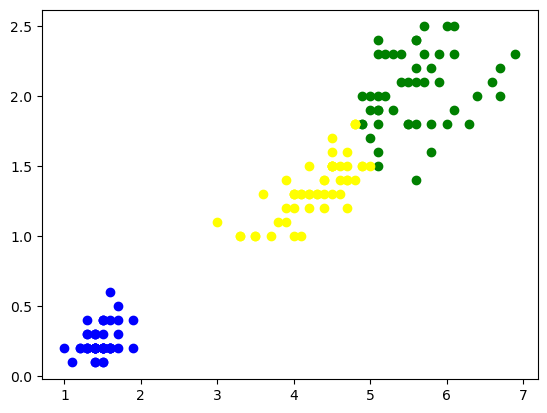

In [11]:
plt.scatter(df1['petal_length'], df1['petal_width'] , color = 'blue')
plt.scatter(df2['petal_length'], df2['petal_width'] , color = 'green')
plt.scatter(df3['petal_length'], df3['petal_width'] , color = 'yellow')

In [12]:
sse = []
k = range(1,10)
for i in k:
    km = KMeans(n_clusters = i)
    km.fit(df[['petal_length','petal_width','cluster']])
    sse.append(km.inertia_)

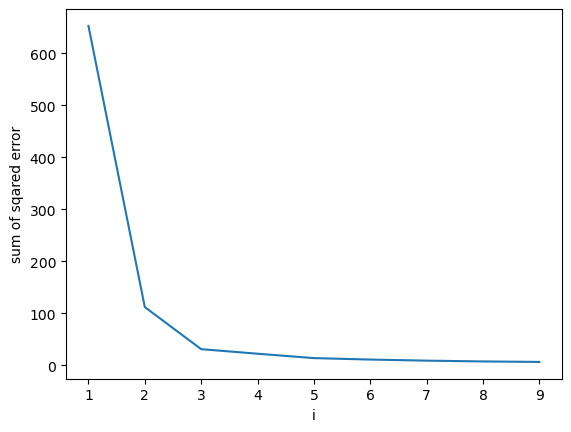

In [13]:
plt.xlabel('i')
plt.ylabel('sum of sqared error')
plt.plot(k,sse)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


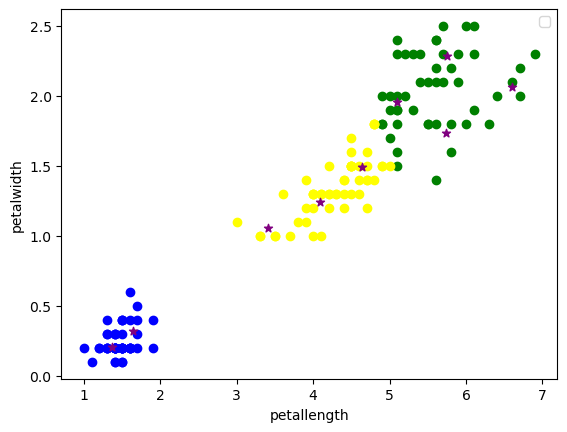

In [14]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['petal_length'], df1['petal_width'] , color = 'blue')
plt.scatter(df2['petal_length'], df2['petal_width'] , color = 'green')
plt.scatter(df3['petal_length'], df3['petal_width'] , color = 'yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')


plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.legend()